# Q5:  5. Is there any relationship between the ABV and the fermentation temperature?

**Access to the PUNKapi**

In [4]:
# import libraries here

import pandas as pd
import json
import requests

# your code here
PUNKIPA = 'https://api.punkapi.com/v2/beers'

response = requests.get(PUNKIPA)
beer = response.json()
#print(json.dumps(beer[0], indent=6))   
beer_df = pd.DataFrame(beer)
punkapi = beer_df[['name','abv','ph','srm','ebc','food_pairing','ingredients','tagline','method']]
punkapi.head()

,name,abv,ph,srm,ebc,food_pairing,ingredients,tagline,method
0,Buzz,4.5,4.4,10.0,20.0,"[Spicy chicken tikka masala, Grilled chicken q...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",A Real Bitter Experience.,"{'mash_temp': [{'temp': {'value': 64, 'unit': ..."
1,Trashy Blonde,4.1,4.4,15.0,15.0,"[Fresh crab with lemon, Garlic butter dipping ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",You Know You Shouldn't,"{'mash_temp': [{'temp': {'value': 69, 'unit': ..."
2,Berliner Weisse With Yuzu - B-Sides,4.2,3.2,4.0,8.0,"[Smoked chicken wings, Miso ramen, Yuzu cheese...","{'malt': [{'name': 'Propino Pale Malt', 'amoun...",Japanese Citrus Berliner Weisse.,"{'mash_temp': [{'temp': {'value': 60, 'unit': ..."
3,Pilsen Lager,6.3,4.4,15.0,30.0,"[Spicy crab cakes, Spicy cucumber and carrot T...","{'malt': [{'name': 'Extra Pale', 'amount': {'v...",Unleash the Yeast Series.,"{'mash_temp': [{'temp': {'value': 65, 'unit': ..."
4,Avery Brown Dredge,7.2,4.4,5.0,10.0,"[Vietnamese squid salad, Chargrilled corn on t...","{'malt': [{'name': 'Lager Malt', 'amount': {'v...",Bloggers' Imperial Pilsner.,"{'mash_temp': [{'temp': {'value': 66, 'unit': ..."


We define two functions to separate the data in punkapi.method for temperature and fermenatation

**Define time in minutes of mash**

In [3]:
def get_dur(row):
    return row['method']['mash_temp'][0]['duration']

mash_duration = pd.DataFrame(punkapi.apply(get_dur, axis=1))
mash_duration.head()
punkapi.insert (5, 'duration', mash_duration)

punkapi.head()

,name,abv,ph,srm,ebc,duration,food_pairing,ingredients,tagline,method
0,Buzz,4.5,4.4,10.0,20.0,75.0,"[Spicy chicken tikka masala, Grilled chicken q...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",A Real Bitter Experience.,"{'mash_temp': [{'temp': {'value': 64, 'unit': ..."
1,Trashy Blonde,4.1,4.4,15.0,15.0,NaN,"[Fresh crab with lemon, Garlic butter dipping ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",You Know You Shouldn't,"{'mash_temp': [{'temp': {'value': 69, 'unit': ..."
2,Berliner Weisse With Yuzu - B-Sides,4.2,3.2,4.0,8.0,10.0,"[Smoked chicken wings, Miso ramen, Yuzu cheese...","{'malt': [{'name': 'Propino Pale Malt', 'amoun...",Japanese Citrus Berliner Weisse.,"{'mash_temp': [{'temp': {'value': 60, 'unit': ..."
3,Pilsen Lager,6.3,4.4,15.0,30.0,NaN,"[Spicy crab cakes, Spicy cucumber and carrot T...","{'malt': [{'name': 'Extra Pale', 'amount': {'v...",Unleash the Yeast Series.,"{'mash_temp': [{'temp': {'value': 65, 'unit': ..."
4,Avery Brown Dredge,7.2,4.4,5.0,10.0,70.0,"[Vietnamese squid salad, Chargrilled corn on t...","{'malt': [{'name': 'Lager Malt', 'amount': {'v...",Bloggers' Imperial Pilsner.,"{'mash_temp': [{'temp': {'value': 66, 'unit': ..."


**Define temperature in ºC of mash**

In [3]:
def get_temp_val(row):
    return row['method']['mash_temp'][0]['temp']['value']

mash_temp = punkapi.apply(get_temp_val, axis=1)
mash_temp.head()


punkapi.insert (6, 'temperature', mash_temp)

punkapi.head()

,name,abv,ph,srm,ebc,duration,temperature,food_pairing,ingredients,tagline,method
0,Buzz,4.5,4.4,10.0,20.0,75.0,64,"[Spicy chicken tikka masala, Grilled chicken q...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",A Real Bitter Experience.,"{'mash_temp': [{'temp': {'value': 64, 'unit': ..."
1,Trashy Blonde,4.1,4.4,15.0,15.0,NaN,69,"[Fresh crab with lemon, Garlic butter dipping ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",You Know You Shouldn't,"{'mash_temp': [{'temp': {'value': 69, 'unit': ..."
2,Berliner Weisse With Yuzu - B-Sides,4.2,3.2,4.0,8.0,10.0,60,"[Smoked chicken wings, Miso ramen, Yuzu cheese...","{'malt': [{'name': 'Propino Pale Malt', 'amoun...",Japanese Citrus Berliner Weisse.,"{'mash_temp': [{'temp': {'value': 60, 'unit': ..."
3,Pilsen Lager,6.3,4.4,15.0,30.0,NaN,65,"[Spicy crab cakes, Spicy cucumber and carrot T...","{'malt': [{'name': 'Extra Pale', 'amount': {'v...",Unleash the Yeast Series.,"{'mash_temp': [{'temp': {'value': 65, 'unit': ..."
4,Avery Brown Dredge,7.2,4.4,5.0,10.0,70.0,66,"[Vietnamese squid salad, Chargrilled corn on t...","{'malt': [{'name': 'Lager Malt', 'amount': {'v...",Bloggers' Imperial Pilsner.,"{'mash_temp': [{'temp': {'value': 66, 'unit': ..."


**Quick overview abouth which parameter is related with**

In [4]:
punkapi.corr()

,abv,ph,srm,ebc,duration,temperature
abv,1.000000,0.076030,0.003290,0.014371,0.168827,-0.051953
ph,0.076030,1.000000,0.217878,0.218577,0.565393,0.547613
srm,0.003290,0.217878,1.000000,0.998674,-0.142240,0.406177
ebc,0.014371,0.218577,0.998674,1.000000,-0.142240,0.383028
duration,0.168827,0.565393,-0.142240,-0.142240,1.000000,0.363149
temperature,-0.051953,0.547613,0.406177,0.383028,0.363149,1.000000


# **RELATIONSHIP BETWEEN PH vs Duration cooking**


**With an expected corr = 0.56**

Plot linear regression

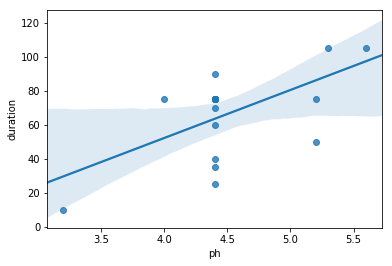

In [7]:
import seaborn as sns

x =punkapi.ph
y = punkapi.duration

regression = sns.regplot( x, y)

Calculate the linear regression of coefficients

In [6]:
from scipy import stats
import matplotlib.pyplot as plt

punkapi = punkapi.dropna() ##we remove ALL rows in which for each value, there is a NaN


X = punkapi['ph']
Y = punkapi['duration']


slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print(f'''slope: {round(slope,3)}
intercept: {round(intercept,3)}
R-square: {round(r_value,3)} 
P-factor: {round(p_value,3)} 
linear regression: {round(std_err,3)} 
      ''')

print (f'''
y = mx +x0 
y = {round(slope,3)}x + {round(intercept,3)}
''')


slope: 28.315
intercept: -61.137
R-square: 0.595 
P-factor: 0.007 
linear regression: 9.283 
      

y = mx +x0 
y = 28.315x + -61.137



**The R-square is 0.595, so there is half correlation between the ph of the beer and duration cooking time.**

**It is so, because the almost beers are with a ph around 4.**